In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [8]:
monthly_report = pd.read_csv('monthly_report.csv')
print(monthly_report.head())

             timestamp purchase                       item
0  2020-01-17 17:23:06        y  cue cards - love actually
1  2020-01-25 17:09:39        n                        NaN
2  2020-01-25 05:22:01        n                        NaN
3  2020-01-18 04:33:40        y      t-rex - jurassic park
4  2020-01-24 17:24:52        n                        NaN


In [10]:
num_purchases = np.sum(monthly_report.purchase == 'y')
print(num_purchases)

41


In [11]:
from scipy.stats import binom_test
p_value = binom_test(num_purchases, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value)

binom_test p-value:  0.1001135269756488


In [12]:
p_value = binom_test(36, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value)

binom_test p-value:  0.018632949611333147


In [21]:
simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
sim_purchased = np.sum(simulated_monthly_visitors == 'y')
print("simulated purchases: ", sim_purchased)
p_value = binom_test(sim_purchased, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value)

simulated purchases:  46
binom_test p-value:  0.3060437171243919


|    **Null hypothesis:** | **is true**  | **is false**  |
|------------------------:|--------------|---------------|
| P-value significant     | Type I Error | Correct!      |
| P-value not significant | Correct!     | Type II error |

In [47]:
false_positives = 0 #this is a counter
sig_threshold = 0.05 #set significance threshold

ss = 500 #sample size
pp = 0.1 #probability of a purchase

pvals = []
 
for i in range(1000):
    sim_visitors = np.random.choice(['y', 'n'], size=ss, p=[pp, 1-pp])
    num_purchases = np.sum(sim_visitors == 'y')
    p_val = binom_test(num_purchases, ss, pp)
    pvals.append(p_val)
    if p_val < sig_threshold:
        false_positives += 1
        
print(false_positives/1000)

0.053


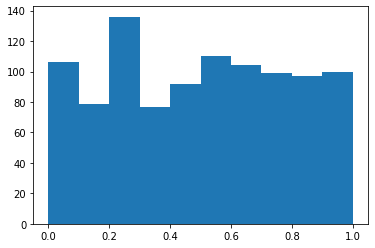

In [48]:
plt.hist(pvals)
plt.show()

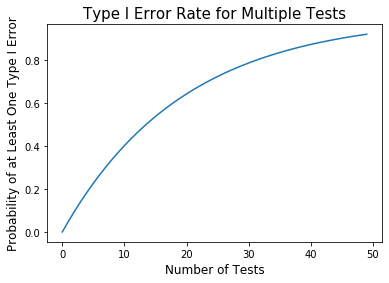

In [50]:
sig_threshold = 0.05
num_tests = np.array(range(50))
probabilities = 1-((1-sig_threshold)**num_tests)
plt.plot(num_tests, probabilities)

plt.title('Type I Error Rate for Multiple Tests', fontsize=15)
plt.ylabel('Probability of at Least One Type I Error', fontsize=12)
plt.xlabel('Number of Tests', fontsize=12)
               
plt.show()

A relevant comic strip:

https://xkcd.com/882/